Loading data

In [2]:
import tensorflow as tf

trainside = tf.keras.utils.image_dataset_from_directory(
                                            "/Users/lait-zet/Desktop/Facial-Emotion-Detection/data/train",
                                             shuffle=True,
                                             batch_size=10,
                                             image_size=(48,48),
                                             validation_split=0.2,
                                             subset='training',
                                             seed = 42
                                             )
validationdata = tf.keras.utils.image_dataset_from_directory(
                                            "/Users/lait-zet/Desktop/Facial-Emotion-Detection/data/train",
                                             shuffle=True,
                                             batch_size=10,
                                             image_size=(48,48),
                                             validation_split=0.2,
                                             subset='validation',
                                             seed = 42
                                             )
for images, labels in trainside.take(1):
    print("shape :",images.shape)
    print("numpy",labels.numpy()) 


Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 28709 files belonging to 7 classes.
Using 5741 files for validation.
shape : (10, 48, 48, 3)
numpy [1 0 3 5 3 6 3 2 2 3]


2025-11-13 23:19:59.647650: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


We have 7 classess

In [3]:
trainside.class_names
    

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

2025-11-13 23:19:59.726522: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


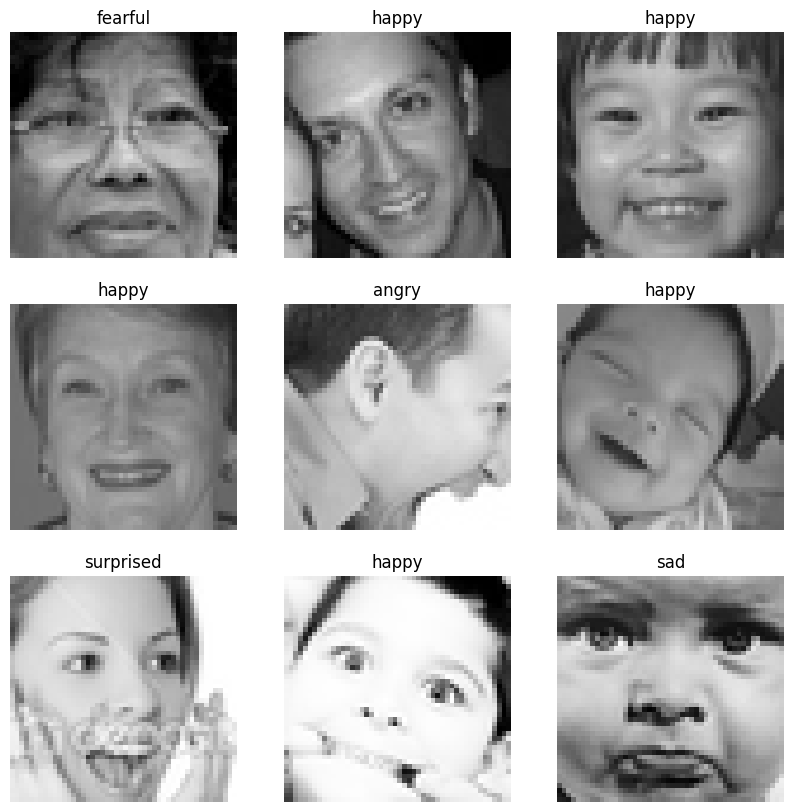

In [4]:
import matplotlib.pyplot as plt
class_names = trainside.class_names

plt.figure(figsize=(10, 10))
for images, labels in trainside.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
#encode labels to one hot vectors
trainside = trainside.map(lambda x, y: (x/255.0, y))
validationdata = validationdata.map(lambda x, y: (x/255.0, y))

Training time 

In [6]:
from tensorflow.keras import layers, models

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )]
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    trainside,
    validation_data=validationdata,
    epochs=20,
    callbacks=callbacks
)  

/Users/lait-zet/Desktop/Facial-Emotion-Detection/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.2762 - loss: 1.7743 - val_accuracy: 0.3689 - val_loss: 1.6155
Epoch 2/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3913 - loss: 1.5666 - val_accuracy: 0.4221 - val_loss: 1.4836
Epoch 3/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.4365 - loss: 1.4495 - val_accuracy: 0.4599 - val_loss: 1.3974
Epoch 4/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.4722 - loss: 1.3774 - val_accuracy: 0.4844 - val_loss: 1.3438
Epoch 5/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.4973 - loss: 1.3235 - val_accuracy: 0.4921 - val_loss: 1.3327
Epoch 6/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5097 - loss: 1.2803 - val_accuracy: 0.5086 - val_loss: 1.2985
Epoch 7/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.5293 - loss: 1.2314 - val_accuracy: 0.5006 - val_loss: 1.3023
Epoch 8/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.5418 - loss: 1

In [7]:
val_acc = model.evaluate(validationdata)
print("Validation accuracy:", val_acc)



575/575 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5086 - loss: 1.2985
Validation accuracy: [1.2985118627548218, 0.5086221694946289]


In [8]:
import joblib
joblib.dump(model, 'emotion_detection_model.pkl')


['emotion_detection_model.pkl']

In [ ]:
load_model =  joblib.load('emotion_detection_model.pkl')

test_imaege = tf.keras.utils.load_img(
    "/Users/lait-zet/Desktop/Facial-Emotion-Detection/images_tester/Express-emotions-1.webp",
    target_size=(48, 48)
)
test_image = tf.keras.utils.img_to_array(test_imaege)
test_image = test_image / 255.0
test_image = tf.expand_dims(test_image, 0)
predictions = load_model.predict(test_image)
predicted_class = tf.argmax(predictions[0]).numpy()
print("Predicted class:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: angry
